In [6]:
import torch
from DDPG import *
import numpy as np
# from utils import plotLearning
import pandas as pd
import matplotlib.pyplot as plt

3.167134401105339


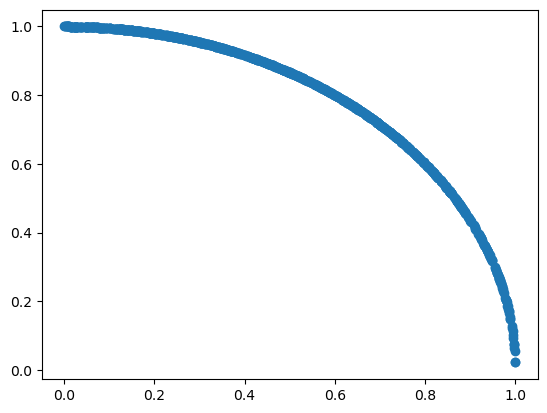

In [50]:
# estimate pi
# x^2 + y^2 = 1
# area = pi
# y = sqrt(1 - x^2)

x = np.random.uniform(0, 1, 1000)
y = np.sqrt(1 - x**2)
print(np.mean(y)*4)
plt.scatter(x, y)


In [38]:
np.mean(y)*4

3.1401844771950382

In [39]:
np.pi

3.141592653589793

In [3]:
c = 0
for i in range(1, 10001):
    x = str(i)
    if '5' not in x:
        c += 1
c

6561

In [25]:
a = np.mgrid[0:2, 0:2, 0:2, 0:2, 0:2, 0:2, 0:2]
a = a.reshape(2**7, -1)
a = pd.DataFrame(a)
a = a.drop_duplicates()

In [28]:
c = 0
for row in a.values:
    if all(row == row[::-1]):
        c += 1

In [30]:
c/a.shape[0]

0.15384615384615385

In [32]:
a

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
9,0,1,1,1,1,1,1
10,1,1,1,1,1,1,1
18,1,1,0,0,0,0,0
22,0,0,0,0,0,0,1
27,1,1,1,0,0,0,0
36,1,1,1,1,0,0,0
41,1,0,0,0,0,0,0
43,0,0,0,1,1,1,1
45,1,1,1,1,1,0,0


In [31]:
a.shape[0]

26

In [2]:
n_asset = 2
x = np.arange(1, 101)
state_possible = np.array(np.meshgrid(*([x] * n_asset))).T.reshape(-1, n_asset).astype(np.float32)
state_possible = state_possible[state_possible.sum(axis=1) == 100, :] / 100

In [3]:
x = state_possible[:, 0]
ddpg_action_df = pd.DataFrame(index=x)
for tc in [0, 0.0005, 0.001, 0.002]:
    agent = Agent(alpha=0.01, beta=0.01, input_dims=[n_asset], tau=0.01, tc=tc,
              batch_size=100000, layer1_size=400, layer2_size=300, n_actions=n_asset)
    agent.load_models()
    action = []
    for current_state in state_possible:
        tmp_action = agent.choose_action(current_state)
        action.append(tmp_action[0]) # just store action of first asset

    action = np.array(action)
    ddpg_action_df[f"TC: {tc * 1e4:.0f} bps"] = action

ddpg_action_df

... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...


,TC: 0 bps,TC: 5 bps,TC: 10 bps,TC: 20 bps
0.01,-0.009998,0.004945,0.015520,-0.000789
0.02,-0.021861,-0.021664,0.017754,0.006988
0.03,-0.013326,-0.022934,0.016784,0.011992
0.04,-0.002590,-0.022261,0.011821,0.010070
0.05,-0.000344,-0.011791,-0.000404,0.000532
...,...,...,...,...
0.95,0.050331,-0.212244,-0.153354,-0.034497
0.96,0.028884,-0.215153,-0.166061,-0.030354
0.97,0.029713,-0.212667,-0.165989,-0.011283
0.98,0.012054,-0.218286,-0.167315,-0.013134


In [4]:
mu = np.linspace(50, 200, n_asset) / 1e4
sigma = np.linspace(300, 800, n_asset) / 1e4
cov = np.diag(sigma ** 2)
optimal_weight = find_optimal_wgt(mu, cov)
x0 = np.ones(len(mu)) / len(mu)

In [5]:
optimal_weight = find_optimal_wgt(mu=mu, cov=cov)
optimal_weight

array([0.63941273, 0.36058727])

In [6]:
plt.rcParams.update({"font.size": 18})

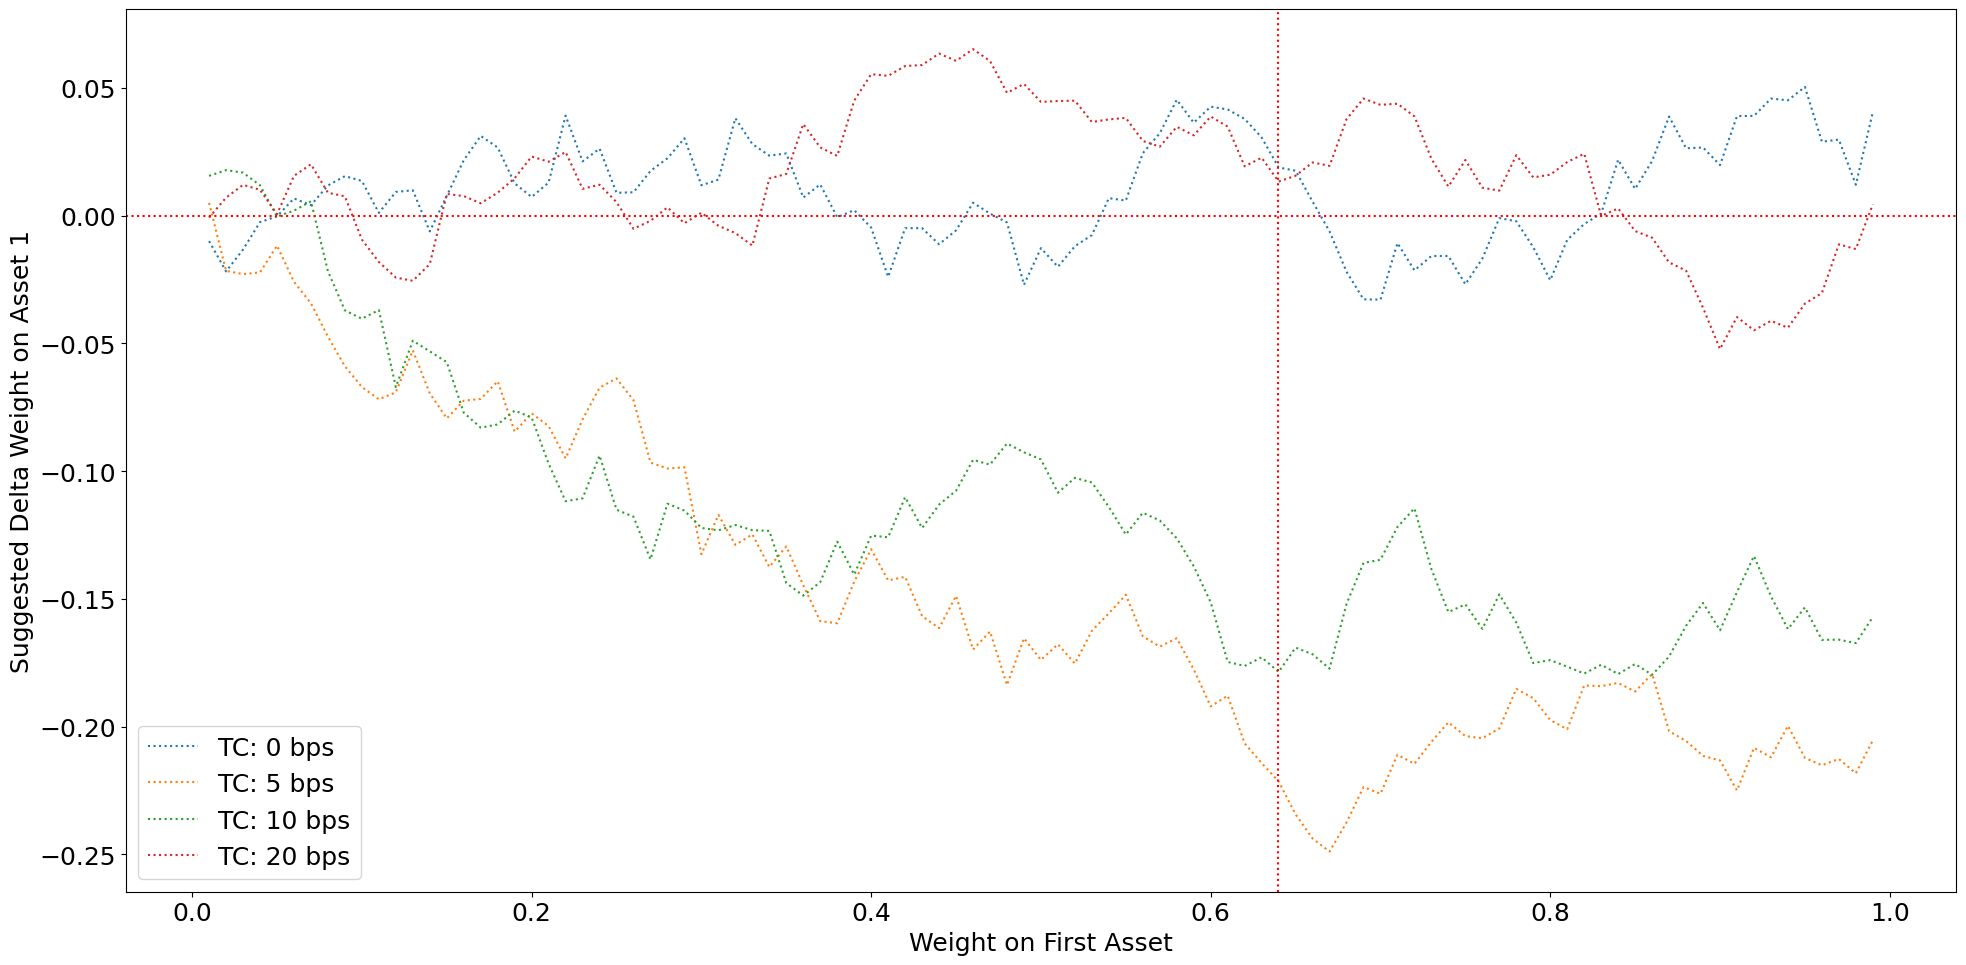

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# ql_action_df.plot(ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
# bell_action_df.plot(ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], linestyle="dashed")
ddpg_action_df.plot(ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], linestyle="dotted")
ax.set_xlabel("Weight on First Asset")
ax.set_ylabel("Suggested Delta Weight on Asset 1")
ax.axvline(optimal_weight[0], color="red", linestyle="dotted")
ax.axhline(0, color="red", linestyle="dotted")
ax.legend()
plt.tight_layout()
plt.show()
# mpl.savefig(os.path.expanduser(f"~/Desktop/bell_qlearn_dqn.png"))
# mpl.close()xx
